In [1]:
from datetime import datetime, timedelta
from utils import get_prices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


EPSILON = 1e-10

# if __name__ == "__main__":

start_time = '1577836800'
end_time = '1578441600'

# df_ = get_prices(
#     'btc', 'usdt',
#     datetime(2020, 1, 1),
#     duration=timedelta(days=7),
#     proxy_port='13070',
#     verbose=2)

df_ = pd.read_csv('data/BTCUSDT[' + start_time + '000_' + end_time + '000].csv')
df_.drop(['Unnamed: 0'], inplace=True, axis=1)
df_['Time'] = pd.to_datetime(df_['Time'])
df_.set_index('Time', inplace=True, drop=True)

times_index = pd.date_range(start=pd.to_datetime(start_time, unit='s'),
                            end=pd.to_datetime(end_time, unit='s'),
                            periods=(int(end_time) - int(start_time) + 1) / 60 + 1)

df = pd.DataFrame(None, columns=df_.columns, index=times_index[:-1])

selected_indices = list(set(df_.index).intersection(set(times_index)))
df.loc[selected_indices, df_.columns] = df_.loc[selected_indices].copy()

In [2]:
window = int(timedelta(hours=1) / timedelta(minutes=1))
period = 10

df['Feature 1'] = df['Taker Buy Volume'] / (df['Volume'] + EPSILON) * 100
df['Feature 2'] = (df['Volume'] + EPSILON).pct_change()
df['Feature 3'] = df['Close'].pct_change() * 1000
tmp = df['High'].rolling(window).max()
df['Feature 4'] = (tmp-df['Open']) / (tmp-df['Low'].rolling(window).min()) * 100

# for i in range(period):
#     df[f'Return {i+1} min'] = (df['Close'].shift(-i-1) / df['Close'] - 1) * 100
df

,Market,Open,High,Low,Close,Volume,Value,No. Trades,Taker Buy Volume,Taker Buy Value,Feature 1,Feature 2,Feature 3,Feature 4
2020-01-01 00:00:00,BTCUSDT,7195.24,7196.25,7183.14,7186.68,51.642812,371233.518355,493,19.59823,140888.414283,37.94958,NaN,NaN,NaN
2020-01-01 00:01:00,BTCUSDT,7187.67,7188.06,7182.2,7184.03,7.248148,52080.127788,135,2.031772,14599.211924,28.031602,-0.859648,-0.368738,NaN
2020-01-01 00:02:00,BTCUSDT,7184.41,7184.71,7180.26,7182.43,11.681677,83903.741635,202,5.479244,39357.081776,46.904601,0.611677,-0.222716,NaN
2020-01-01 00:03:00,BTCUSDT,7183.83,7188.94,7182.49,7185.94,10.025391,72033.226649,136,3.294966,23680.571924,32.866209,-0.141785,0.488693,NaN
2020-01-01 00:04:00,BTCUSDT,7185.54,7185.54,7178.64,7179.78,14.911105,107066.521825,161,2.369033,17012.015138,15.887709,0.487334,-0.857230,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-07 23:55:00,BTCUSDT,8163.09,8180.78,8162.58,8174.52,56.340474,460369.470177,664,34.532792,282162.676837,61.293045,0.125954,1.400205,23.84747
2020-01-07 23:56:00,BTCUSDT,8174.52,8176.52,8162.58,8168.48,46.824082,382487.910867,442,18.526946,151332.558308,39.567131,-0.168909,-0.738881,17.734517
2020-01-07 23:57:00,BTCUSDT,8167.76,8170.67,8157.5,8158.96,42.212437,344654.966852,403,19.19538,156750.172947,45.473281,-0.098489,-1.165456,21.349877
2020-01-07 23:58:00,BTCUSDT,8158.73,8162.0,8153.77,8161.5,103.923,847779.49378,538,56.297305,459258.542236,54.172132,1.461905,0.311314,26.179271


In [3]:
# df.to_csv('data/data.csv')

In [5]:
df['Return'] = (df['Close'] / df['Open'] - 1) * 100
df

,Market,Open,High,Low,Close,Volume,Value,No. Trades,Taker Buy Volume,Taker Buy Value,Feature 1,Feature 2,Feature 3,Feature 4,Return
2020-01-01 00:00:00,BTCUSDT,7195.24,7196.25,7183.14,7186.68,51.642812,371233.518355,493,19.59823,140888.414283,37.94958,NaN,NaN,NaN,-0.118968
2020-01-01 00:01:00,BTCUSDT,7187.67,7188.06,7182.2,7184.03,7.248148,52080.127788,135,2.031772,14599.211924,28.031602,-0.859648,-0.368738,NaN,-0.050642
2020-01-01 00:02:00,BTCUSDT,7184.41,7184.71,7180.26,7182.43,11.681677,83903.741635,202,5.479244,39357.081776,46.904601,0.611677,-0.222716,NaN,-0.02756
2020-01-01 00:03:00,BTCUSDT,7183.83,7188.94,7182.49,7185.94,10.025391,72033.226649,136,3.294966,23680.571924,32.866209,-0.141785,0.488693,NaN,0.029372
2020-01-01 00:04:00,BTCUSDT,7185.54,7185.54,7178.64,7179.78,14.911105,107066.521825,161,2.369033,17012.015138,15.887709,0.487334,-0.857230,NaN,-0.080161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-07 23:55:00,BTCUSDT,8163.09,8180.78,8162.58,8174.52,56.340474,460369.470177,664,34.532792,282162.676837,61.293045,0.125954,1.400205,23.84747,0.140021
2020-01-07 23:56:00,BTCUSDT,8174.52,8176.52,8162.58,8168.48,46.824082,382487.910867,442,18.526946,151332.558308,39.567131,-0.168909,-0.738881,17.734517,-0.073888
2020-01-07 23:57:00,BTCUSDT,8167.76,8170.67,8157.5,8158.96,42.212437,344654.966852,403,19.19538,156750.172947,45.473281,-0.098489,-1.165456,21.349877,-0.107741
2020-01-07 23:58:00,BTCUSDT,8158.73,8162.0,8153.77,8161.5,103.923,847779.49378,538,56.297305,459258.542236,54.172132,1.461905,0.311314,26.179271,0.033951


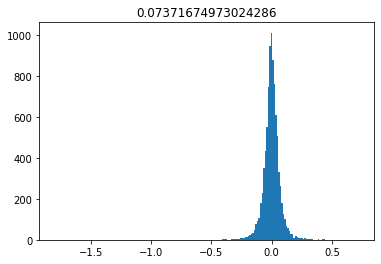

In [61]:
def get_linear_dynamics_with_lsm(seq, n, frame_size, memory):
    m = max(memory-1, n-frame_size)
    if n <= memory:
        return None
    A = np.zeros([n-m, memory])
    for i in range(memory):
        A[:, i] = seq[m-i:n-i]
    b = np.array(seq[m+1:n+1], dtype='float64')
    theta, _, _, _ = np.linalg.lstsq(A, b, rcond=-1)
    F = np.zeros([memory, memory])
    F[0, :] = theta
    for i in range(1, memory):
        F[i, i-1] = 1
    return F

z = df['Return'].values

errors = np.zeros(len(z))
frame_size = 1000
memory = 10
for n in range(frame_size, len(z)):
    F = get_linear_dynamics_with_lsm(z, n, frame_size, memory)
    errors[n] = np.dot(F, z[np.arange(n-1, n-memory-1, -1)])[0] - z[n]

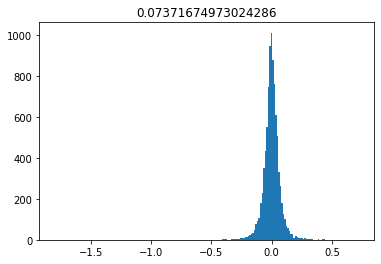

In [62]:
plt.hist(errors[frame_size:len(z)], bins=200)
plt.title(errors[frame_size:len(z)].std())
plt.show()

In [60]:
x = np.array([-2.1, -1,  4.3])

y = np.array([0,  1,  0.2])

X = np.stack((x, x+y, y), axis=0)

np.cov(X)

array([[11.71, 11.4 , -0.31],
       [11.4 , 11.37, -0.03],
       [-0.31, -0.03,  0.28]])

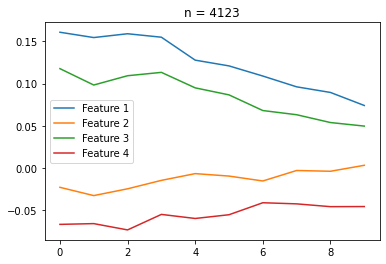

In [4]:
from scipy.stats import pearsonr
result = []
data = df.dropna().copy()
data = data[(data['Feature 2'] >= 3) & (data['No. Trades'] > 100)]
for i in range(period):
    for j in range(4):
        result.append(pearsonr(data[f'Return {i+1} min'], data[f'Feature {j+1}']))
result = np.array(result)
result = result.reshape(-1, 8)
for j in range(4):
    plt.plot(result[:, 2*j], label=f'Feature {j+1}')
plt.legend()
plt.title(f'n = {len(data)}')
plt.show()

In [6]:
# t_train_start = datetime(2018, 1, 1, 1)
# t_train_duration = timedelta(hours=6)
# x_train = x.loc[t_train_start:t_train_start+t_train_duration-timedelta(minutes=1)]
# A =